In [18]:
# 쉬는날을 찾기

import random
import pandas as pd
import numpy as np
import os
import holidays

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings(action='ignore') 
korea_holidays = holidays.SouthKorea(years=2023)

In [7]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [8]:
train = pd.read_csv('./open/train.csv')
train['timestamp'] = pd.to_datetime(train['timestamp'])
train = train.set_index('timestamp')
split_data = [i.reset_index() for i in pd.DataFrame(train.resample('3M'))[1]]
split_data[0]

,timestamp,ID,item,corporation,location,supply(kg),price(원/kg)
0,2019-01-01,TG_A_J_20190101,TG,A,J,0.0,0.0
1,2019-01-01,TG_A_S_20190101,TG,A,S,0.0,0.0
2,2019-01-01,TG_B_J_20190101,TG,B,J,0.0,0.0
3,2019-01-01,TG_B_S_20190101,TG,B,S,0.0,0.0
4,2019-01-01,TG_C_J_20190101,TG,C,J,0.0,0.0
...,...,...,...,...,...,...,...
1204,2019-01-31,BC_D_J_20190131,BC,D,J,2584.0,2052.0
1205,2019-01-31,BC_E_J_20190131,BC,E,J,6360.0,1963.0
1206,2019-01-31,BC_E_S_20190131,BC,E,S,2296.0,2129.0
1207,2019-01-31,CB_F_J_20190131,CB,F,J,243736.0,396.0


In [41]:
train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

target = []
for date, name in sorted(korea_holidays.items()):
    target.append(str(date))
train['Isholiday'] = train['timestamp'].apply(lambda x: 1 if x in target else 0)
test['Isholiday'] = test['timestamp'].apply(lambda x: 1 if x in target else 0)

train = train.drop(train[(train['supply(kg)'] > 0) & (train['price(원/kg)'] == 0)].index)
train = train.reset_index(drop=True)

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
train['Is_Sunday'] = train['timestamp'].dt.day_name() == 'Sunday'
test['Is_Sunday'] = test['timestamp'].dt.day_name() == 'Sunday'

# no supply -> no price
# train['classify'] = train['supply(kg)'].apply(lambda x: 0 if x == 0 else 1)
train['Is_Sunday'] = train['Is_Sunday'].apply(lambda x: 0 if x == False else 1)    
test['Is_Sunday'] = test['Is_Sunday'].apply(lambda x: 0 if x == False else 1)
tar = train[(train['Is_Sunday'] == 1) & (train['price(원/kg)'] > 0)].index
train = train.drop(tar)

train['timestamp'] = train['timestamp'].astype('str')
train['year'] = train['timestamp'].apply(lambda x : int(x[0:4]))
train['month'] = train['timestamp'].apply(lambda x : int(x[5:7]))
train['day'] = train['timestamp'].apply(lambda x : int(x[8:10]))

test['timestamp'] = test['timestamp'].astype('str')
test['year'] = test['timestamp'].apply(lambda x : int(x[0:4]))
test['month'] = test['timestamp'].apply(lambda x : int(x[5:7]))
test['day'] = test['timestamp'].apply(lambda x : int(x[8:10]))

qual_col = ['item', 'corporation', 'location']

for i in qual_col:
    le = LabelEncoder()
    train[i]=le.fit_transform(train[i])
    test[i]=le.transform(test[i]) #test 데이터에 대해서 fit하는 것은 data leakage에 해당합니다

train = train.drop(['supply(kg)','ID','timestamp'],axis=1)
test = test.drop(['timestamp'],axis=1) # ID

train = train[train['price(원/kg)'] < 7500].reset_index(drop=True)

print('Done.')

Done.


In [40]:
le = OneHotEncoder()
le.fit_transform(np.array(train['item']).reshape(-1,1))
le.

array(['x0_BC', 'x0_CB', 'x0_CR', 'x0_RD', 'x0_TG'], dtype=object)

In [10]:
tp1 = train[(train['year'] == 2019) & (train['month'] == 3) & (train['day'] > 3)]
tp2 = train[(train['year'] == 2020) & (train['month'] == 3) & (train['day'] > 3)]
tp3 = train[(train['year'] == 2021) & (train['month'] == 3) & (train['day'] > 3)]
tp4 = train[(train['year'] == 2022) & (train['month'] == 3) & (train['day'] > 3)]

val1 = tp1.drop('price(원/kg)',axis=1)
val2 = tp2.drop('price(원/kg)',axis=1)
val3 = tp3.drop('price(원/kg)',axis=1)
val4 = tp4.drop('price(원/kg)',axis=1)

actual1 = tp1['price(원/kg)']
actual2 = tp2['price(원/kg)']
actual3 = tp3['price(원/kg)']
actual4 = tp4['price(원/kg)']

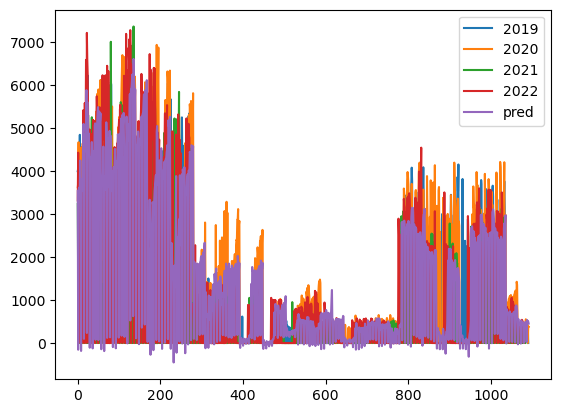

In [11]:
train[(train['year'] == 2019) & (train['day'] > 3) &
      (train['month'] == 3)]['price(원/kg)'].reset_index(drop=True).plot()
train[(train['year'] == 2020) & (train['day'] > 3) &
      (train['month'] == 3)]['price(원/kg)'].reset_index(drop=True).plot()
train[(train['year'] == 2021) & (train['day'] > 3) &
      (train['month'] == 3)]['price(원/kg)'].reset_index(drop=True).plot()
train[(train['year'] == 2022) & (train['day'] > 3) &
      (train['month'] == 3)]['price(원/kg)'].reset_index(drop=True).plot()
pd.read_csv('./rg-scale.csv')['answer'].plot()

plt.legend(['2019','2020','2021','2022','pred'])

In [12]:
train_location1 = pd.DataFrame(pd.DataFrame(train.groupby('location'))[1][0]).reset_index(drop=True)
train_location2 = pd.DataFrame(pd.DataFrame(train.groupby('location'))[1][1]).reset_index(drop=True)

test_location1 = pd.DataFrame(pd.DataFrame(test.groupby('location'))[1][0]).reset_index(drop=True)
test_location2 = pd.DataFrame(pd.DataFrame(test.groupby('location'))[1][1]).reset_index(drop=True)

train_location1 = train_location1[(train_location1['month'] == 2) |
                                 (train_location1['month'] == 3) |
                                 (train_location1['month'] == 4)]

In [13]:
from pycaret import regression
regression.setup(data=train,target='price(원/kg)'
                     ,train_size=0.9
                     ,fold=10
                     ,session_id=42)

,Description,Value
0,Session id,42
1,Target,price(원/kg)
2,Target type,Regression
3,Original data shape,"(58243, 9)"
4,Transformed data shape,"(58243, 9)"
5,Transformed train set shape,"(52418, 9)"
6,Transformed test set shape,"(5825, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [14]:
best = regression.compare_models(n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,265.4489,537744.5221,732.7273,0.8209,2.0608,0.1877,1.2370
xgboost,Extreme Gradient Boosting,376.2729,573398.3125,756.9609,0.8090,3.7249,0.2488,0.7380
et,Extra Trees Regressor,254.7811,579231.9298,760.3941,0.8071,1.8795,0.1833,1.0620
catboost,CatBoost Regressor,391.2891,589825.0621,767.7828,0.8035,3.7858,0.2578,2.8060
lightgbm,Light Gradient Boosting Machine,373.7775,591551.0113,768.8954,0.8029,3.5279,0.2696,0.1060
dt,Decision Tree Regressor,299.0934,876503.3295,935.5935,0.7080,2.0248,0.2329,0.0360
gbr,Gradient Boosting Regressor,548.6735,894751.6471,945.6964,0.7019,4.2029,0.3438,0.6600
knn,K Neighbors Regressor,535.2503,899719.2562,948.3483,0.7002,3.4423,0.3847,0.0760
ada,AdaBoost Regressor,782.7941,1323658.0323,1150.3040,0.5588,4.7264,0.3856,0.1860
br,Bayesian Ridge,1152.9777,2477834.6244,1573.9621,0.1741,5.1602,0.8617,0.0190


In [15]:
def prediction(val):
    pred =  0.6*best[0].predict(val) + 0.2*best[1].predict(val) + 0.2*best[2].predict(val)
    return pred

# pred1 = prediction(val1)
# pred2 = prediction(val2)
# pred3 = prediction(val3)
# pred4 = prediction(val4)

# def cross_metric(act,pred):
#     rmse = np.sqrt(mean_squared_error(act,pred))
#     print(f"RMSE : {rmse}")
#     print('')

# cross_metric(actual1,pred1) # 2019 3
# cross_metric(actual2,pred2) # 2020 3
# cross_metric(actual3,pred3) # 2021 3
# cross_metric(actual4,pred4) # 2022 3


In [16]:
prediction(test.drop('ID',axis=1))


array([3567.72288672,   24.23554039, 3798.52371387, ...,  471.09629016,
        495.30537109,  515.37232782])

In [294]:
# for i in test_location1.index:
#     target.loc[i,'answer'] = test_location1.loc[i,'answer']
# target = target.reset_index()

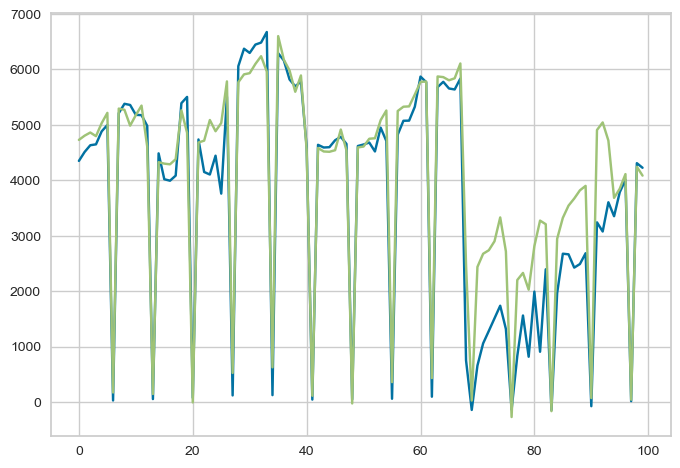

<Axes: >

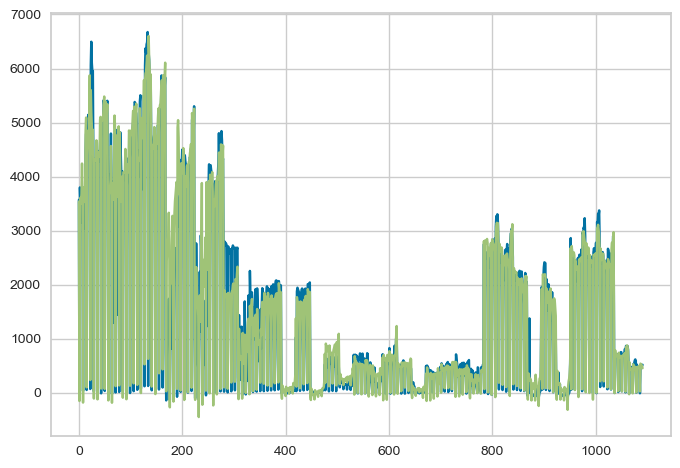

In [17]:
confirm_interval = 1
plt.plot(prediction(test.drop('ID',axis=1))[100*confirm_interval:100*(confirm_interval+1)])
pd.read_csv('./rg-scale.csv')['answer'][100*confirm_interval:100*(confirm_interval+1)].reset_index(drop=True).plot()
plt.show()
plt.plot(prediction(test.drop('ID',axis=1)))
pd.read_csv('./rg-scale.csv')['answer'].reset_index(drop=True).plot()


In [297]:
submission = pd.read_csv('./open/sample_submission.csv')
submission['answer'] = prediction(test.drop('ID',axis=1)) 
submission.to_csv('./cut_price_7000.csv', index=False)


In [159]:
train = pd.read_csv('./open/train.csv')
test = pd.read_csv('./open/test.csv')

target = []
for date, name in sorted(korea_holidays.items()):
    target.append(str(date))
train['Isholiday'] = train['timestamp'].apply(lambda x: 1 if x in target else 0)
test['Isholiday'] = test['timestamp'].apply(lambda x: 1 if x in target else 0)

train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
train['Is_Sunday'] = train['timestamp'].dt.day_name() == 'Sunday'
test['Is_Sunday'] = test['timestamp'].dt.day_name() == 'Sunday'
train['Is_Sunday'] = train['Is_Sunday'].apply(lambda x: 0 if x == False else 1)    
test['Is_Sunday'] = test['Is_Sunday'].apply(lambda x: 0 if x == False else 1)    


tar = train[(train['Is_Sunday'] == 1) & (train['price(원/kg)'] > 0)].index
train = train.drop(tar)
train

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),Isholiday,Is_Sunday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,0,0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,0,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,0,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,0,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,0,0
...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,0,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,0,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,1,0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,0,0


In [ ]:
train[train['timestamp']]